![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings_JSL/Legal/4.1.ZeroShot_Legal_Ner.ipynb)

#  Zero-Shot Named Entity Recognition in Spark NLP

In this notebook, you will find an example of Zero-Shot NER model (`legner_roberta_zeroshot`) that is the first of its kind and can detect any named entities without using any annotated dataset to train a model. 

`ZeroShotNerModel` annotator also allows extracting entities by crafting appropriate prompts to query **any RoBERTa Question Answering model**. 


You can check the model card here: [Models Hub](https://nlp.johnsnowlabs.com/2022/08/29/zero_shot_ner_roberta_en.html)

## Colab Setup

In [ ]:
# Install the johnsnowlabs library to access Spark-OCR and Spark-NLP for Healthcare, Finance, and Legal.
! pip install -q johnsnowlabs 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.2/74.2 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.6/570.6 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.4/448.4 KB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 MB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.1 MB/s eta 0:00:00


In [ ]:
from johnsnowlabs import nlp, finance,legal

nlp.install(force_browser=True)

<IPython.core.display.Javascript object>

127.0.0.1 - - [06/Jan/2023 18:52:27] "GET /login?code=cWQKnUQQ38hIDALNl7trv2M7HhZ3Ai HTTP/1.1" 200 -


<IPython.core.display.Javascript object>

Licenses extracted successfully
📋 Stored John Snow Labs License in /root/.johnsnowlabs/licenses/license_number_0_for_Spark-Healthcare_Spark-OCR.json
👷 Setting up  John Snow Labs home in /root/.johnsnowlabs, this might take a few minutes.
🙆 JSL Home setup in /root/.johnsnowlabs
Installing /root/.johnsnowlabs/py_installs/spark_nlp_jsl-4.2.4-py3-none-any.whl to /usr/bin/python3
Running: /usr/bin/python3 -m pip install /root/.johnsnowlabs/py_installs/spark_nlp_jsl-4.2.4-py3-none-any.whl
Installed 1 products:
💊 Spark-Healthcare==4.2.4 installed! ✅ Heal the planet with NLP! 


In [ ]:
spark = nlp.start()

👌 Launched cpu optimized session with with: 🚀Spark-NLP==4.2.4, 💊Spark-Healthcare==4.2.4, running on ⚡ PySpark==3.1.2


## Zero-shot Learning: NER

Named Entity Recognition is the NLP task aimed to tag chunks of information with specific labels.

NER has been historically carried out using rule-based approaches, machine learning and more recently, Deep Learning models, including transformers.

If we ignore the traditional rule-based approach, which consisted on having Subject Matter experts (SME) creating rules using regular expressions, vocabularies, ontologies, etc., the common steps for the rest of Machine Learning based NER approaches were:


1.  Collect and clean data
1.   Having SME annotating many documents;
2.   Create features (only if using ML approaches, since Deep Learning does that feature extraction for you in most cases);
3.  Train a model on a training dataset;
4.  Evaluate on a test test;


If it is not accurate, go to step number 1.

This process takes a long time, specially if the nature of the use case is complex and requires many examples for the model to learn.

Thankfully, **Zero-shot** comes to help, since it does not require any training data, drastically speeding up the process. *Zero-shot* models can be:

It can be a model on it’s own, with average accuracy;
It can be used to preannotate the documents and speed up the process of annotations by SME;
**Financial NLP** includes *Zero-shot* NER, which uses prompts in form of questions, and retrieves the answers to those questions as tagged chunks of information.

*This is an example of Entity labels and some prompts.*



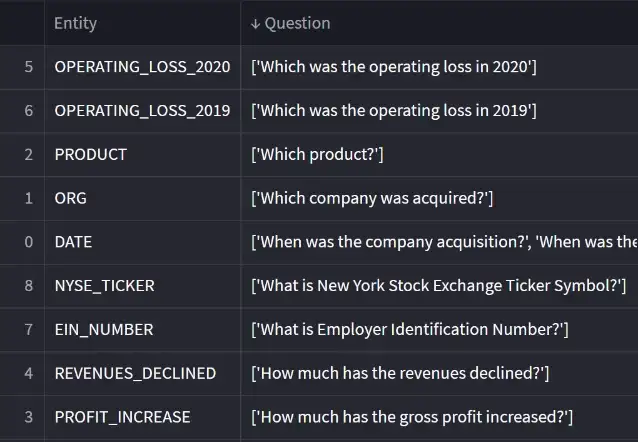

*Zero-shot* prompts to carry out Named Entity Recognition
And this is the result of applying them with our Zero-shot Financial NER model.


Example of some entities extracted with the previous prompts

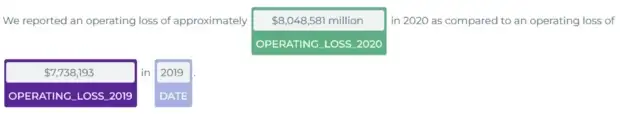

### NER Question Generator

#### Answering Questions on Legal Texts
One of the latests biggest outcomes in NLP are **Language Models** and their ability to answer questions, expressed in natural language.

`Zero-shot` is a new inference paradigm which allows us to use a model for prediction without any previous training step.

For doing that, several examples (hypotheses) are provided and sent to the Language model, which will use `NLI (Natural Language Inference)` to check if the any information found in the text matches the examples (confirm the hypotheses).

NLI usually works by trying to confirm or reject an hypotheses. The hypotheses are the `prompts` or examples we are going to provide. If any piece of information confirm the constructed hypotheses (answer the examples we are given), then the hypotheses is confirmed and the Zero-shot is triggered.

> *In February 2017, the Company entered into an asset purchase agreement with NetSeer, Inc.
...
 The Company hereby grants to Seller a perpetual, non-exclusive, royalty-free license.
...
On March 12, 2020, we closed a Loan and Security Agreement with Hitachi Capital American Corp (also known as "Hitachi")
...*






**Question Answeering (QA)** uses specific Language Models trained to carry out **Natural Language Inference (NLI)**

**NLI** works as follows:
- Given a text as a Premise (P);
- Given a hypotheses (H) as a question to be solved;
   - Then, we ask the Language Model is H is `entailed`, `contradicted` or `not related` in P. 

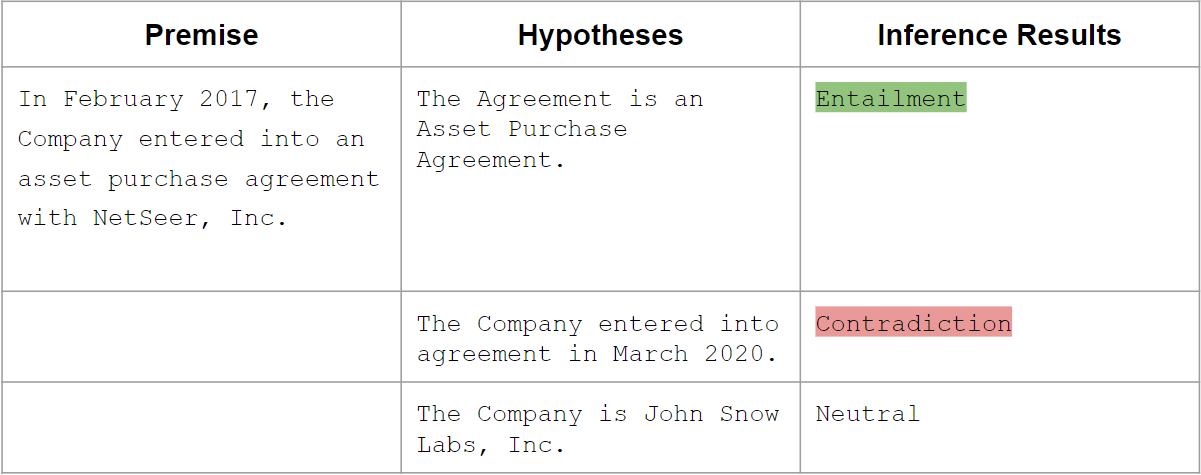

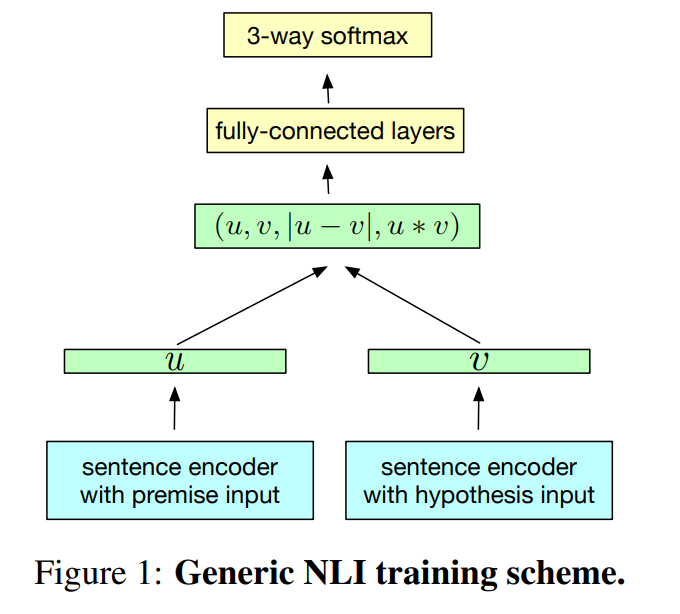




Let's see it in action.

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
  .setInputCol("text")\
  .setOutputCol("document")

sen = nlp.SentenceDetector()\
  .setInputCols(["document"])\
  .setOutputCol("sentence")

sparktokenizer = nlp.Tokenizer()\
  .setInputCols("sentence")\
  .setOutputCol("token")

zero_shot_ner = legal.ZeroShotNerModel.pretrained("legner_roberta_zeroshot", "en", "legal/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("zero_shot_ner")\
    .setEntityDefinitions(
        {
            "DATE": ['When was the company acquisition?', 'When was the company purchase agreement?', "When was the agreement?"],
            "ORG": ["Which company?"],
            "STATE": ["Which state?"],
            "AGREEMENT": ["What kind of agreement?"],
            "LICENSE": ["What kind of license?"],
            "LICENSE_RECIPIENT": ["To whom the license is granted?"]
        })
    

nerconverter = nlp.NerConverter()\
  .setInputCols(["sentence", "token", "zero_shot_ner"])\
  .setOutputCol("ner_chunk")

pipeline =  nlp.Pipeline(stages=[
  documentAssembler,
  sen,
  sparktokenizer,
  zero_shot_ner,
  nerconverter
    ]
)

legner_roberta_zeroshot download started this may take some time.
[OK!]


In [ ]:
from pyspark.sql.types import StructType,StructField, StringType

sample_text = ["""In March 2012, as part of a longer-term strategy, the Company acquired Vertro, Inc., which owned and operated the ALOT product portfolio.""",
              """In February 2017, the Company entered into an asset purchase agreement with NetSeer, Inc.""",
              """This INTELLECTUAL PROPERTY AGREEMENT, dated as of December 31, 2018 (the 'Effective Date') is entered into by and between Armstrong Flooring, Inc., a Delaware corporation ('Seller') and AFI Licensing LLC, a Delaware company (the 'Licensee')""",
              """The Company hereby grants to Seller a perpetual, non- exclusive, royalty-free license"""]

p_model = pipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

res = p_model.transform(spark.createDataFrame(sample_text, StringType()).toDF("text"))

In [ ]:
from pyspark.sql import functions as F

res.select(F.explode(F.arrays_zip(res.ner_chunk.result, res.ner_chunk.begin, res.ner_chunk.end, res.ner_chunk.metadata)).alias("cols")) \
   .select(F.expr("cols['0']").alias("chunk"),
           F.expr("cols['3']['entity']").alias("ner_label"))\
   .filter("ner_label!='O'")\
   .show(truncate=False)

+-------------------------------------+-----------------+
|chunk                                |ner_label        |
+-------------------------------------+-----------------+
|March 2012                           |DATE             |
|Vertro, Inc                          |ORG              |
|February 2017                        |DATE             |
|asset purchase agreement             |AGREEMENT        |
|NetSeer                              |ORG              |
|INTELLECTUAL PROPERTY                |AGREEMENT        |
|December 31, 2018                    |DATE             |
|Armstrong Flooring                   |LICENSE_RECIPIENT|
|Delaware                             |STATE            |
|AFI Licensing LLC, a Delaware company|LICENSE_RECIPIENT|
|Seller                               |LICENSE_RECIPIENT|
|perpetual                            |LICENSE          |
|non- exclusive                       |LICENSE          |
|royalty-free                         |LICENSE          |
+-------------

#### We have just seen how simple it is to obtain the output without having to deal with the hassle of model training.

#### Let's now look at how to enhance the model's predictions in scenarios where there may be incorrectly identified labels or fewer labels overall.

**Let's look at an instance where the text's predictions are incorrect and discuss how to make them better:**

In [ ]:
lp = nlp.LightPipeline(p_model)
sample_text = ["The maximum penalty for a first-time DUI offense in California is up to six months in jail and a fine of up to $1,000 , according to state law.", "The company is required to file its annual report with the state of California by March 31st of each year. Failure to do so may result in fines of $1,000 .", "Pursuant to the laws of the State of Delaware, the company XYZ, Inc. was properly organized and is currently in good standing with its principal place of business located at 123 Main Street, Anytown, USA 12345.","The corporation known as DEF Inc. was incorporated under the laws of the State of Illinois on April 1, 2018 and has its principal place of business at 456 Main Street, Anytown, USA 54321 ."]

# from sparknlp_display import NerVisualizer
for i in range(len(sample_text)):
  print('***'*30,f'Text Number - {i+1}')
  visualiser = nlp.viz.NerVisualizer()
  lp_res_1 = lp.fullAnnotate(sample_text[i])
  visualiser.display(lp_res_1[0], label_col='ner_chunk', document_col='document')

****************************************************************************************** Text Number - 1


****************************************************************************************** Text Number - 2


****************************************************************************************** Text Number - 3


****************************************************************************************** Text Number - 4


#### Here, it is clear that many of the model-identified text entities are incorrect.




1.   We can observe that the **DATE** label has been misidentified in the first text.
2.   The label **LICENSE RECEPIENT** on the second text shouldn't be used to refer to it.
3.   In the 4th text `USA` has been identified as text but it should rather be identified as `ADDRESS`. 




*Let's try to fix these by modifying and including some prompts:*

In [ ]:
zero_shot_ner = legal.ZeroShotNerModel.pretrained("legner_roberta_zeroshot", "en", "legal/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("zero_shot_ner")\
    .setEntityDefinitions(
        {
            "DATE": ['When was the company acquisition?', 'When was the company purchase agreement?', "When was the agreement?"],
            "ORG": ["Which company?"],
            "STATE": ["Which state?"],
            "AGREEMENT": ["What kind of agreement?"],
            "LICENSE": ["What kind of license?"],
            "LICENSE_RECIPIENT": ["To whom the license is granted?"],
            "ADDRESS": ['What is the address of the company'],
            "FINE_RECEPIENT": ['How much fine?']
        })

legner_roberta_zeroshot download started this may take some time.
[OK!]


#### To make the model predictions better, We could think of adding new labels or rephrasing the texts so that the model can better identify the entities inside the text.

From the sentences, it is clear that there are other valuable entities that can improve the model's ability to predict: `FINE RECEPIENT`, `ADDRESS`.



In [ ]:
pipeline =  nlp.Pipeline(stages=[
  documentAssembler,
  sen,
  sparktokenizer,
  zero_shot_ner,
  nerconverter
    ]
)

p_model = pipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

lp = nlp.LightPipeline(p_model)

sample_text = ["The maximum penalty for a first-time DUI offense in California is up to six months in jail and a fine of up to $1,000 , according to state law.", "The company is required to file its annual report with the state of California by March 31st of each year. Failure to do so may result in fines of $1,000 .", "Pursuant to the laws of the State of Delaware, the company XYZ, Inc. was properly organized and is currently in good standing with its principal place of business located at 123 Main Street, Anytown, USA 12345.","The corporation known as DEF Inc. was incorporated under the laws of the State of Illinois on April 1, 2018 and has its principal place of business at 456 Main Street, Anytown, USA 54321 ."]

# from sparknlp_display import NerVisualizer
for i in range(len(sample_text)):
  print('***'*30,f'Text Number - {i+1}')
  visualiser = nlp.viz.NerVisualizer()
  lp_res_1 = lp.fullAnnotate(sample_text[i])
  visualiser.display(lp_res_1[0], label_col='ner_chunk', document_col='document')

****************************************************************************************** Text Number - 1


****************************************************************************************** Text Number - 2


****************************************************************************************** Text Number - 3


****************************************************************************************** Text Number - 4


Now let's see how to generate prompts automatically using Spark NLP

## NER, Question Generation and Question Answering for Long-Span extraction

Legal documents are known to be very long. Although you can divide the docuuments into paragraphs or sections, and those into sentences, the resulted sentences are still long.

Let's take a look at this example:

`Buyer shall use such materials and supplies only in accordance with the present agreement`

Not, let's imagine we want to extract three entities:
1) The Subject (`Buyer`)
2) The Action (`shall use`)
3) The Object (what the Buyer shall use? - `such materials and supplies only in accordance with the present agreement`)

Although Subject and Action can be totally manageable by traditional NER, it usually struggles the longer the spans are. Trying to model the extraction of Object with a simple NER may result in word fading, when some of the initial or ending words fade into `O`.

We present in this notebook a solution for Long Span Extraction: Using an Automatic Question Generator and a Question Answering model to:
1) First, using NER, detect entities as the `Subject` and the `Action`. 

Example: `Buyer - SUBJECT`, `shall use - OBJECT`

2) Automatically generate a question to ask for the `Object`, using `Subject` and `Action`;

Example: `What shall the Buyer use?`

3) Use the question and the sentence to retrieve `Object`, without the limitations of traditional NER;

Example: `What shall the Buyer use? such materials and supplies only in accordance with the present agreement`

Last, but not least, it's very important to chose a domain-specific Question Answering model.


# Answering the question - `What?`
Let's suppose we have the sentence of the example:

`The Buyer shall use such materials and supplies only in accordance with the present agreement`

In Spark NLP for Legal, we have a trained NER model which is able to extract Subjects (`Buyer`) and Actions (`shall use`) of agreements / obligations with good accuracy.

It's also trained for extracting the `Object` using NER, but it's usage is limited due to the restrictions commented above.

Let's get SUBJECT and ACTION and automatically create a question with them.

In [ ]:
text = """The Buyer shall use such materials and supplies only in accordance with the present agreement"""

In [ ]:
import pandas as pd

documentAssembler = nlp.DocumentAssembler()\
  .setInputCol("text")\
  .setOutputCol("document")

sparktokenizer = nlp.Tokenizer()\
  .setInputCols("document")\
  .setOutputCol("token")

tokenClassifier = legal.BertForTokenClassification.pretrained("legner_obligations", "en", "legal/models")\
  .setInputCols("token", "document")\
  .setOutputCol("label")\
  .setCaseSensitive(True)

nerconverter = nlp.NerConverter()\
  .setInputCols(["document", "token", "label"])\
  .setOutputCol("ner_chunk")

# setEntities1 says which entity from NER goes first in the question
# setEntities2 says which entity from NER goes second in the question
# setQuestionMark to True adds a '?' at the end of the sentence (after entity 2)
# To sum up, the pattern is     [QUESTIONPRONOUN] [ENTITY1] [ENTITY2] [QUESTIONMARK]
qagenerator = legal.NerQuestionGenerator()\
  .setInputCols(["ner_chunk"])\
  .setOutputCol("question")\
  .setQuestionMark(False)\
  .setQuestionPronoun("What")\
  .setEntities1(["OBLIGATION_SUBJECT"])\
  .setEntities2(["OBLIGATION_ACTION"])

  
pipeline =  nlp.Pipeline(stages=[
  documentAssembler,
  sparktokenizer,
  tokenClassifier,
  nerconverter,
  qagenerator
    ]
)

p_model = pipeline.fit(spark.createDataFrame(pd.DataFrame({'text': ['']})))

res = p_model.transform(spark.createDataFrame([[text]]).toDF("text"))

legner_obligations download started this may take some time.
[OK!]


In [ ]:
res.select('question.result').show(truncate=False)

+-----------------------+
|result                 |
+-----------------------+
|[What Buyer shall use ]|
+-----------------------+



In [ ]:
texts = [
    """The Buyer shall use such materials and supplies only in accordance with the present agreement""",
    """The Provider will notify the Buyer about the release date""",
    """Amazon agrees to supply 1-year license without fees""",
    """The Supplier should ship the product in less than 1 month"""
]

pdf = pd.DataFrame(texts, columns = ["text"])
pdf

,text
0,The Buyer shall use such materials and supplie...
1,The Provider will notify the Buyer about the r...
2,Amazon agrees to supply 1-year license without...
3,The Supplier should ship the product in less t...


In [ ]:
df = spark.createDataFrame(pdf)

In [ ]:
res = p_model.transform(df)

In [ ]:
res.select('question.result').show(truncate=False)

+-------------------------------+
|result                         |
+-------------------------------+
|[What Buyer shall use ]        |
|[What Provider will notify ]   |
|[What Amazon agrees to supply ]|
|[What Supplier should ship ]   |
+-------------------------------+

